In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
def preproc_x(x, flatten=True):
    x = x / 255.
    x = -1 + 2*x
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu")(x)
            x = keras.layers.Dense(units=n_units, activation="relu")(x)
            x = keras.layers.Dense(units=n_units, activation="relu")(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model 

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1651

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 20
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 162us/step - loss: 1.7146 - accuracy: 0.3882 - val_loss: 1.5535 - val_accuracy: 0.4491
Epoch 2/20
50000/50000 [==============================] - 8s 153us/step - loss: 1.4857 - accuracy: 0.4732 - val_loss: 1.4619 - val_accuracy: 0.4840
Epoch 3/20
50000/50000 [==============================] - 8s 153us/step - loss: 1.3605 - accuracy: 0.5193 - val_loss: 1.4361 - val_accuracy: 0.4999
Epoch 4/20
50000/50000 [==============================] - 8s 154us/step - loss: 1.2654 - accuracy: 0.5511 - val_loss: 1.3784 - val_accuracy: 0.5174
Epoch 5/20
50000/50000 [==============================] - 8s 153us/step - loss: 1.1930 - accuracy: 0.5794 - val_loss: 1.3432 - val_accuracy: 0.5298
Epoch 6/20
50000/50000 [==============================] - 8s 154us/step - loss: 1.1048 - accuracy: 0.6069 - val_loss: 1.3829 - val_accuracy: 0.5223
Epoch 7/20
50000/50000 [==============================] - 8s 1

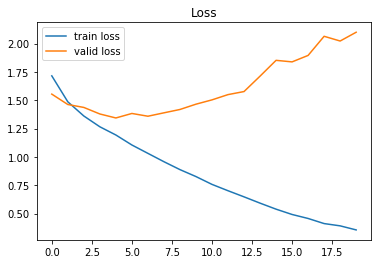

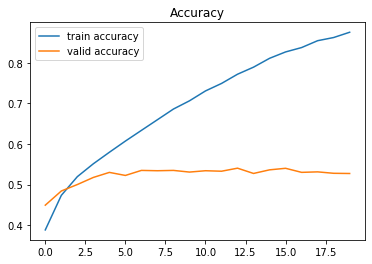

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()